In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 11)})

In [2]:
item_price = pd.read_csv("./sales data/Items.csv", sep=';', header=1)
data = pd.read_csv("./sales data/Bakery_price.csv", sep=';', header=1)

In [3]:
data['DateTime'] = pd.to_datetime(data.DateTime, format='%Y-%m-%d %H:%M:%S')
data = data.assign(Price = 3)
data.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Price
0,1,Coffee,2016-10-30 09:58:11,Morning,Weekend,3
1,2,Pancake vegan,2016-10-30 10:05:34,Morning,Weekend,3
2,2,Pancake vegan,2016-10-30 10:05:34,Morning,Weekend,3
3,3,Cappucino,2016-10-30 10:07:57,Morning,Weekend,3
4,3,Nutella panini,2016-10-30 10:07:57,Morning,Weekend,3


In [4]:
data['Year'] = data['DateTime'].dt.year 
data['Month'] = data['DateTime'].dt.month 
data['Date'] = data['DateTime'].dt.date
data.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Price,Year,Month,Date
0,1,Coffee,2016-10-30 09:58:11,Morning,Weekend,3,2016,10,2016-10-30
1,2,Pancake vegan,2016-10-30 10:05:34,Morning,Weekend,3,2016,10,2016-10-30
2,2,Pancake vegan,2016-10-30 10:05:34,Morning,Weekend,3,2016,10,2016-10-30
3,3,Cappucino,2016-10-30 10:07:57,Morning,Weekend,3,2016,10,2016-10-30
4,3,Nutella panini,2016-10-30 10:07:57,Morning,Weekend,3,2016,10,2016-10-30


In [5]:
dfItems = data['Items'].value_counts()

In [6]:
data['Date'].values

array([datetime.date(2016, 10, 30), datetime.date(2016, 10, 30),
       datetime.date(2016, 10, 30), ..., datetime.date(2017, 9, 4),
       datetime.date(2017, 9, 4), datetime.date(2017, 9, 4)], dtype=object)

In [18]:
data_by_date = data.groupby(by='Date', as_index=False).sum()
data_by_date = data_by_date.drop(columns = ['TransactionNo', 'Year', 'Month'])
data_by_date

,Date,Price
0,2016-01-11,450
1,2016-01-12,249
2,2016-02-11,492
3,2016-02-12,312
4,2016-03-11,567
...,...,...
154,2017-11-02,555
155,2017-11-03,609
156,2017-12-01,216
157,2017-12-02,339


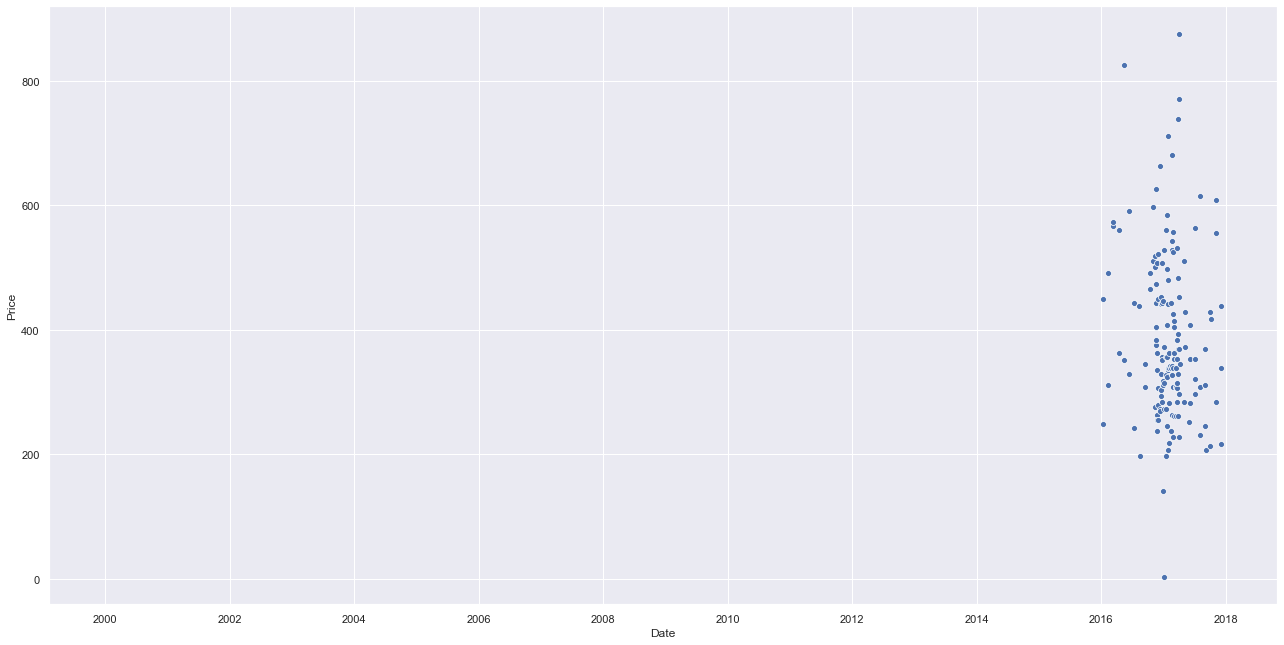

In [20]:
sns.scatterplot(data=data_by_date, x="Date", y="Price")

In [21]:
data['Year'].value_counts()

2017    12363
2016     8144
Name: Year, dtype: int64